# Comcast Telecom Consumer Complaints .

DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

    Ticket #: Ticket number assigned to each complaint
    Customer Complaint: Description of complaint
    Date: Date of complaint
    Time: Time of complaint
    Received Via: Mode of communication of the complaint
    City: Customer city
    State: Customer state
    Zipcode: Customer zip
    Status: Status of complaint
    Filing on behalf of someone

Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

   - Import data into Python environment.
   - Provide the trend chart for the number of complaints at monthly and daily granularity levels.
   - Provide a table with the frequency of complaint types.

- Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

    - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
    - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. 
    
-Provide insights on:

- Which state has the maximum complaints
- Which state has the highest percentage of unresolved complaints

    - Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Import data into Python environment.

In [2]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [3]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df["date_index"] = df["Date_month_year"] + " " + df["Time"]

In [5]:
df["date_index"] = pd.to_datetime(df["date_index"])
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])

In [6]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [7]:
df = df.set_index(df["date_index"])

In [8]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47


### Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [9]:
df["Date_month_year"].value_counts()[:5]

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
Name: Date_month_year, dtype: int64

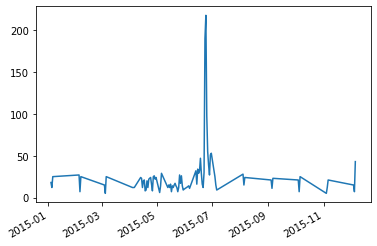

In [10]:
df["Date_month_year"].value_counts().plot();

In [11]:
f = df.groupby(pd.Grouper(freq="M")).size()

In [12]:
f.head()

date_index
2015-01-31     55
2015-02-28     59
2015-03-31     45
2015-04-30    375
2015-05-31    317
Freq: M, dtype: int64

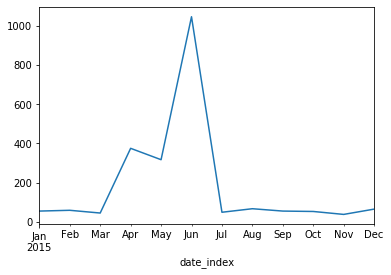

In [13]:
df.groupby(pd.Grouper(freq="M")).size().plot()

<b>Month Wise</b> : Between Apr to Jul, found high count of complaints. <br>
<b>Day Wise</b> : Around after 25 Jun, got high count of complaints.

### Provide a table with the frequency of complaint types.

In [14]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [15]:
df["Status"].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

### Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. 

In [16]:
df["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]

In [17]:
df["newStatus"].value_counts()

Closed    1707
Open       517
Name: newStatus, dtype: int64

In [18]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,newStatus
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed


In [19]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)[:5]

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


In [20]:
Status_complaints = df.groupby(["State","newStatus"]).size().unstack().fillna(0)
Status_complaints.head()

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0


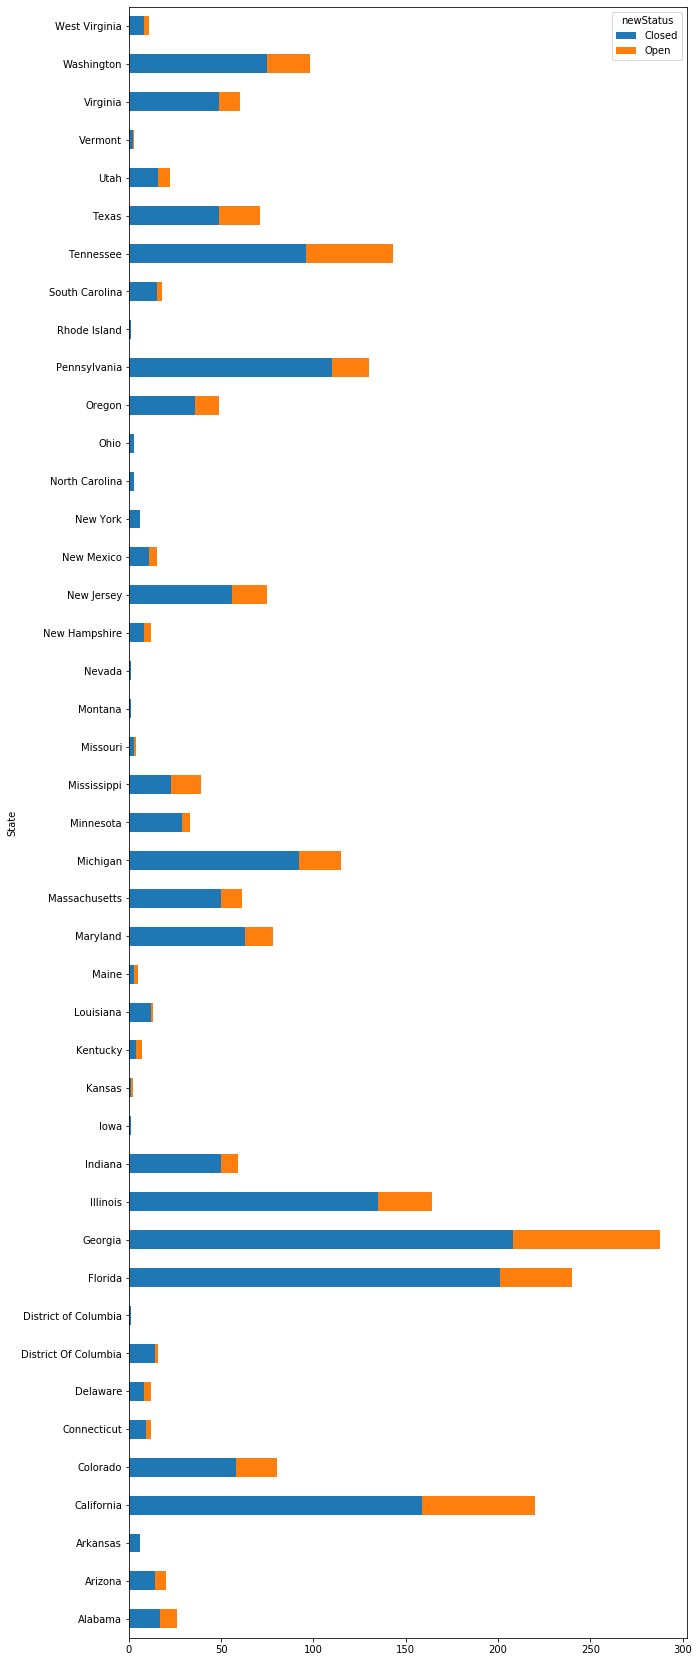

In [21]:
Status_complaints.plot(kind="barh", figsize=(10,30), stacked=True)

### Which state has the maximum complaints

In [22]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).max()

State    West Virginia
Count              288
dtype: object

West Virginia has maximum count of complaints 

### Which state has the highest percentage of unresolved complaints

In [23]:
df[df["newStatus"]=="Open"].groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).max()

State    West Virginia
Count               80
dtype: object

West Virginia has highest percentage of unresolved complaints.

In [24]:
df.groupby(["State","newStatus"]).size().unstack().fillna(0).max()

newStatus
Closed    208.0
Open       80.0
dtype: float64

### Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [25]:
df[df["newStatus"]=="Closed"].groupby(["Received Via"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)

,Received Via,Count
0,Customer Care Call,864
1,Internet,843


There are 864+843=<b>1707</b> complaints resolved till date, which were received through the Internet and customer care calls